<a href="https://colab.research.google.com/github/skredenmathias/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module4_clustering_LS_DS_134_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [5]:
df = df.drop(['diagnosis', 'id', 'Unnamed: 32'], axis=1)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [6]:
# Perform K-Means Clustering on the Dataset 
df.dtypes

0 categorical columns
0 numerical columns


radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

In [7]:
# Got a NaN / infinite error below, checking for NaNs
np.any(np.isnan(df))

False

In [8]:
df.shape

(569, 30)

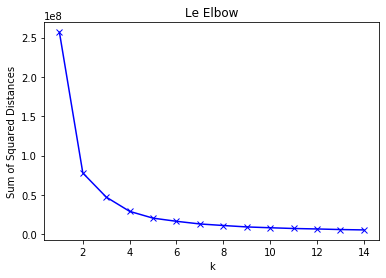

In [14]:
# Elbow graph
sum_of_squared_distances = []
K = range(1,15)
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(df)
  sum_of_squared_distances.append(km.inertia_)

# Plot the code
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Le Elbow')
plt.show()

In [15]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)
labels = kmeans.labels_

print(labels)

[1 1 1 0 1 2 1 2 2 2 2 2 1 2 2 2 2 1 3 2 0 0 2 3 1 1 2 1 2 1 1 2 1 1 2 2 2
 0 2 2 2 0 1 2 2 1 0 2 0 2 0 2 0 1 2 0 1 2 0 0 0 0 2 0 2 2 0 0 0 0 1 0 1 2
 0 2 0 1 1 0 0 0 3 1 0 1 2 1 0 2 2 2 2 2 2 1 0 0 0 2 2 0 0 0 0 2 0 0 3 0 0
 0 2 0 0 0 0 2 2 1 0 1 3 2 0 2 2 1 2 1 0 2 2 2 1 0 0 0 2 0 0 2 0 0 0 0 0 2
 2 2 0 0 0 0 2 0 1 2 0 0 0 1 1 0 3 2 0 1 1 2 0 2 2 0 0 0 0 2 0 0 3 1 2 0 2
 0 1 0 0 0 2 0 0 2 2 0 2 1 1 2 0 1 1 2 0 2 0 2 0 2 1 0 3 2 2 2 0 0 1 3 2 2
 0 2 2 2 0 2 0 2 2 0 0 1 0 2 3 1 2 1 2 0 0 2 1 0 0 0 0 0 1 0 1 1 1 2 1 2 2
 2 1 1 1 2 1 3 0 2 0 0 2 0 3 0 1 0 0 1 2 2 1 0 1 2 0 0 0 0 0 0 2 2 0 0 0 2
 0 0 2 0 1 0 1 0 0 0 0 0 2 2 0 2 0 0 0 0 0 1 0 0 0 1 0 1 0 0 2 0 2 2 2 0 0
 0 0 1 0 1 0 3 2 0 0 1 0 0 0 2 0 0 0 2 3 2 0 0 0 2 0 0 0 0 0 2 2 1 1 0 3 3
 2 2 1 1 2 2 0 2 2 0 0 0 0 0 0 2 0 2 0 1 0 0 1 1 0 2 2 0 0 0 1 0 0 0 0 0 2
 0 1 0 0 0 0 2 2 0 0 1 0 0 0 2 0 2 0 0 0 0 0 0 2 0 1 1 2 2 0 2 2 2 0 1 2 0
 1 0 1 2 2 1 0 1 0 2 0 2 0 0 0 0 1 3 2 0 2 2 2 0 1 0 0 0 2 0 0 0 2 2 0 2 0
 2 2 2 2 0 2 1 0 2 0 1 1 

In [16]:
# Add labels to the dataframe
new_series = pd.Series(labels)
df.copy = df
df.copy['clusters'] = new_series.values

df.copy.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,clusters
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [0]:
# centroids = get_centroids(df, 'clusters')
# plot_clusters(df, 'clusters', centroids)

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [0]:
df.dtypes # Can i do the categorical tech with floats?

In [0]:
df2 = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")

In [0]:
df2.drop(['id', 'Unnamed: 32'], axis=1)

In [0]:
df2['diagnosis'] = df2['diagnosis'].astype('category')

In [0]:
df2.head()

In [0]:
df2.drop(['id', 'Unnamed: 32'], axis=1)

In [0]:
df2['diagnosis_codes'] = df2['diagnosis'].cat.codes

In [46]:
# Add labels to the dataframe
# new_series = pd.Series(labels)
df2['clusters'] = new_series.values

df2.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis_codes,clusters
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1,0
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1,1


In [47]:
# then just look at those columns with the clusters:
df2[['diagnosis', 'diagnosis_codes', 'clusters']]

,diagnosis,diagnosis_codes,clusters
0,M,1,1
1,M,1,1
2,M,1,1
3,M,1,0
4,M,1,1
...,...,...,...
564,M,1,1
565,M,1,1
566,M,1,2
567,M,1,1


In [21]:
# float_cols = df.columns[df.dtypes=='float64']
# num_cols = df.columns[df.dtypes=='int64']

# print(f'{len(float_cols)} float columns')
# print(f'{len(num_cols)} numerical columns')

# cat_cols = df.columns[df.dtypes=='object']
# num_cols = df.columns[df.dtypes!='object']

# print(f'{len(cat_cols)} categorical columns')
# print(f'{len(num_cols)} numerical columns')

0 categorical columns
31 numerical columns


In [24]:
# for col in float_cols:
#   df[col] = df[col].cat.codes

# print(df.shape)
# df.head()

AttributeError: ignored

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [0]:
df3 = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")

In [0]:
y = df3['diagnosis']

In [0]:
y.head()

In [0]:
X = df3.drop(['diagnosis', 'id', 'Unnamed: 32'], axis=1)

In [0]:
# Only k-means Clustering
kmeans = KMeans(2)
# Not transforming (no eigens, etc)
kmeans.fit(X)

print(kmeans.labels_)

In [57]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [0]:
plt.scatter(X['radius_mean'], X['texture_mean']);

In [62]:
X['clustering_labels'] = kmeans.labels_
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,clustering_labels
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [0]:
df['diagnosis'][:30]

In [0]:
X['clustering_labels'][:30]

In [0]:
X['diagnosis'] = df['diagnosis']

In [68]:
# crosstab cause yes why not
pd.crosstab(X['clustering_labels'], X['diagnosis'])

diagnosis,B,M
clustering_labels,,
0,1,130
1,356,82


In [0]:
X['diagnosis'] = X['diagnosis'].replace({"B":1, "M": 0})

In [76]:
(X['diagnosis'] == X['clustering_labels']).value_counts()

True     486
False     83
dtype: int64

In [77]:
# Accuracy for X vars clustering
(X['diagnosis'] == X['clustering_labels']).value_counts()[1] / len(X)# or [True] and /df.shape

0.8541300527240774

In [83]:
grouped.mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
clustering_labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,19.379924,21.694580,128.231298,1185.929771,0.101295,0.148613,0.176939,0.100699,0.191540,0.060603,0.742804,1.222538,5.250580,95.678168,0.006599,0.032177,0.042420,0.015674,0.020304,0.003953,23.709466,28.912672,158.496183,1753.022901,0.140425,0.357758,0.449306,0.192431,0.311882,0.086165,0.007634
1,12.556299,18.570365,81.123470,496.061872,0.094884,0.091100,0.062438,0.033433,0.178058,0.063454,0.304191,1.215153,2.152881,23.785292,0.007173,0.023475,0.028746,0.010636,0.020614,0.003748,14.043902,24.709543,91.937511,619.647945,0.129959,0.223312,0.219215,0.091330,0.283554,0.083282,0.812785


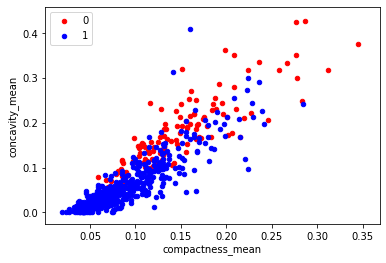

In [85]:
# PCA + Clustering

fig, ax = plt.subplots()

colors = {0: "red", 1: "blue"}

grouped = X.groupby('clustering_labels')

for key, group in grouped:
  group.plot(ax=ax, kind='scatter', x='compactness_mean', y='concavity_mean', label=key, color=colors[key])
# colors are a property of a supervised model.
plt.show()

In [0]:
df4 = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df4.shape)
df4.head()

In [0]:
X = df4.drop(['diagnosis', 'id', 'Unnamed: 32'], axis=1)

In [0]:
# Standardize
scaler = StandardScaler()
Z = scaler.fit_transform(X)

In [0]:
pca = PCA(6)
pca_columns = pca.fit_transform(Z)

In [0]:
# scree_plot # Eyeballing: ~6


In [0]:
kmeans = KMeans(2)
kmeans.fit(pca_columns)

print(kmeans.labels_)

In [0]:
X['cluster_labels'] = kmeans.labels_
X['diagnosis'] = df['diagnosis'] # Can use df version instead

X.head()

In [0]:
# pd.crosstab(X['diagnosis'])...

In [0]:
X['diagnosis'] = X['diagnosis'].replace({"B": 0, "M": 1})

In [100]:
(X['diagnosis'] == X['cluster_labels']).value_counts()[1] / len(X)

0.08963093145869948

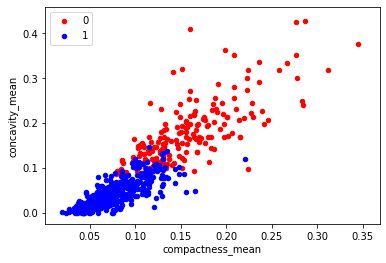

In [102]:
fig, ax = plt.subplots()

colors = {0: "red", 1: "blue"}

grouped = X.groupby('cluster_labels')

for key, group in grouped:
  group.plot(ax=ax, kind='scatter', x='compactness_mean', y='concavity_mean', label=key, color=colors[key])
# colors are a property of a supervised model.
plt.show()

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project